## Kernel SVM

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('../../Datasets/Social_Network_Ads.csv')
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [28]:
df.corr(numeric_only=True)

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


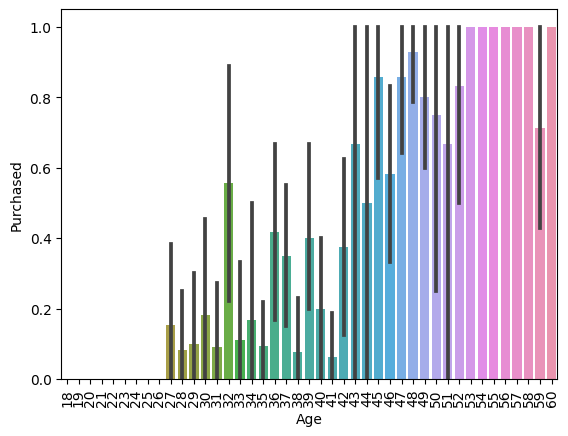

In [29]:
sns.barplot(x='Age',y='Purchased',data=df)
plt.xticks(rotation=90)
plt.show()

In [30]:
df['Purchased'].values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [58]:
df.drop(columns=['User ID','Gender'],inplace=True)

In [59]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [60]:
X = df.iloc[:,:2].values
y = df.iloc[:,2].values

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.32,random_state=42)

In [62]:
Sc = StandardScaler()
X_train = Sc.fit_transform(X_train)
X_test = Sc.transform(X_test)

In [66]:
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [67]:
y_pred = classifier.predict(X_test)

In [69]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[73,  5],
       [ 2, 48]])

In [71]:
acc = accuracy_score(y_test,y_pred)
acc*100

94.53125

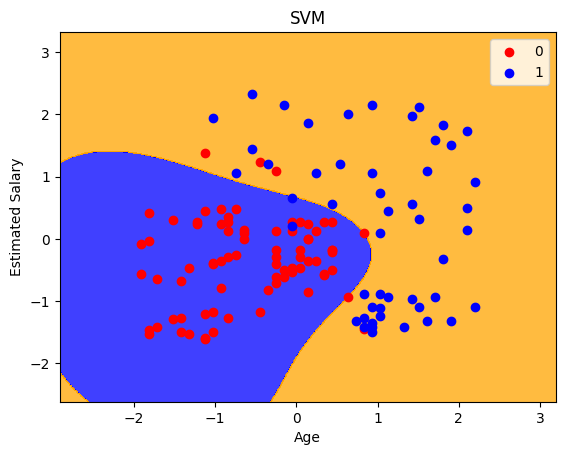

In [84]:
X_set, y_set = X_test, y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,stop=X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('Blue', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'Blue'))(i), label = j)
plt.title('SVM')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

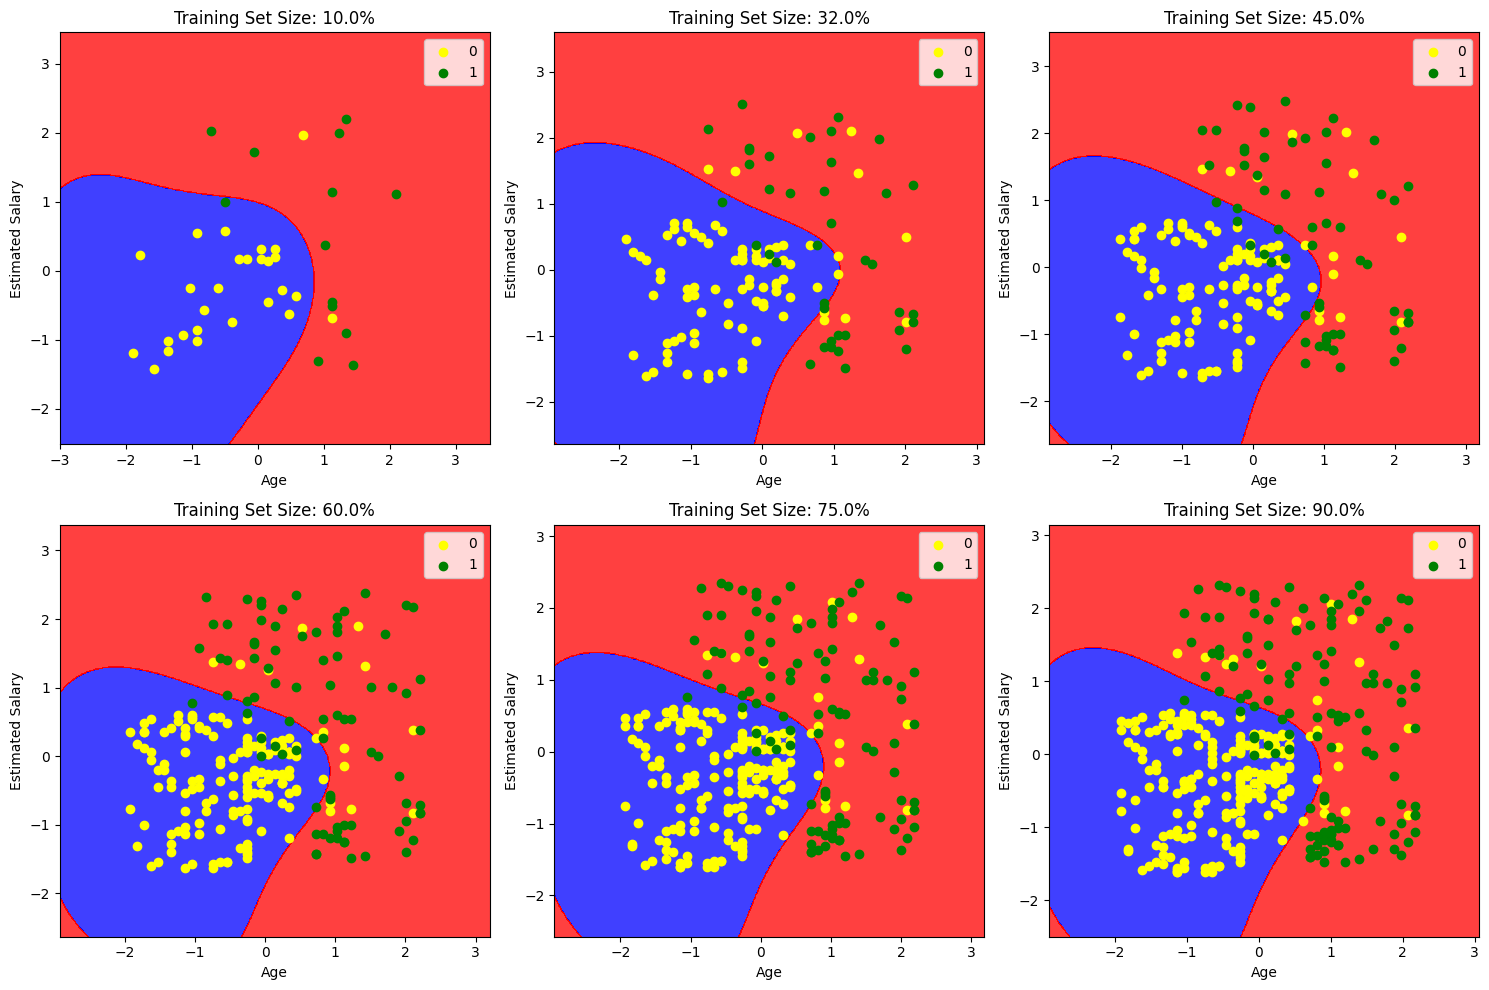

In [118]:

boundary_plots = []
training_set_sizes = [0.1, 0.32, 0.45,0.60, 0.75, 0.9]
for train_size in training_set_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_size, random_state=42)
    Sc = StandardScaler()
    X_train = Sc.fit_transform(X_train)
    X_test = Sc.transform(X_test)
    classifier = SVC(kernel='rbf', random_state=0)
    classifier.fit(X_train, y_train)
    X1, X2 = np.meshgrid(np.arange(start=X_test[:, 0].min() - 1, stop=X_test[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_test[:, 1].min() - 1, stop=X_test[:, 1].max() + 1, step=0.01))
    Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Z = Z.reshape(X1.shape)
    boundary_plots.append((X1, X2, Z, X_train, y_train))
plt.figure(figsize=(15, 10))
for i, plot_data in enumerate(boundary_plots, start=1):
    plt.subplot(2, 3, i)
    plt.contourf(plot_data[0], plot_data[1], plot_data[2], alpha=0.75, cmap=ListedColormap(('blue', 'red')))
    plt.xlim(plot_data[0].min(), plot_data[0].max())
    plt.ylim(plot_data[1].min(), plot_data[1].max())
    for j, label in enumerate(np.unique(plot_data[4])):
        plt.scatter(plot_data[3][plot_data[4] == label, 0], plot_data[3][plot_data[4] == label, 1],
                    c=ListedColormap(('yellow', 'green'))(j), label=label)
    plt.title(f'Training Set Size: {training_set_sizes[i-1]*100}%')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()

plt.tight_layout()
plt.show()


In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
svc_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'degree': [2, 3],  # Only used if kernel is 'poly'
    'gamma': [0.1, 1, 10],  # Only used if kernel is 'rbf', 'poly', or 'sigmoid'
}

In [112]:
cv = GridSearchCV(classifier,param_grid=svc_params,cv=5,scoring='accuracy')

In [113]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3],
                         'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [114]:
cv.best_params_

{'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}

In [115]:
y_pred = cv.predict(X_test)

In [117]:
acc = accuracy_score(y_test,y_pred)
acc*100

95.0